# Borrower Reliability Research


**The main objective** of this project is to understand whether the marital status and the number of children of the client affects the fact of repayment of the loan on time. 

The customer is a credit department of a bank. The input data contains statistics on the solvency of clients. The results of the research will be taken into account in the future when building a credit scoring model.

Thus, the study will mainly involve data preprocessing and analysis.

### Data description:
- `children` - number of children in the family
- `days_employed` - total length of service in days
- `dob_years` - client's age in years
- `education` - client's education level
- `education_id` - education level identifier
- `family_status` - marital status
- `family_status_id` - family status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - whether he/she had debts on loan repayment
- `total_income` - monthly income
- `purpose` - purpose of loan

In [2]:
import pandas as pd

# data loading
data = pd.read_csv('/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data preprocessing

### Missing values (part 1)

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Two columns have missing values. One of them (`total_income`) stores data on income. The amount of income is most affected by the type of employment, so fill in the gaps in this column with the median value for each type from the `income_type` column.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

We will eliminate the missing values in the other column a little later, after we investigate the anomalous values.

### Abnormal values

In our case, the abnormal values are negative numbers of days of labor history in the column `days_employed`. Let's transform them into positive ones.

In [6]:
data['days_employed'] = data['days_employed'].abs()

In [7]:
# median values
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. It is difficult to correct such values and we will not need this column in the future, so let's leave them as they are.

Let's take a look at the column `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

There are two abnormal values in the `children` column. Let's delete these rows.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
# check
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Missing values (part 2)

Let's fill in the blanks in the `days_employed` column with the median values for each `income_type` of employment.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
# check
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Changing data types

Let's replace the real data type in the `total_income` column with an integer one using the `astype()` method.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Duplicate processing

First, let's handle the implicit duplicates in the `education` column. This column contains the same values, but written in different ways: using upper and lower case letters.

In [14]:
data['education'] = data['education'].str.lower()

In [15]:
# duplicate check
data.duplicated().sum()

71

In [16]:
# duplicate removal
data = data.drop_duplicates()

### Categorizing data

Based on the ranges below, let's create a `total_income_category` column in the dataframe with the categories:**

- 0-30000 - `'E'`
- 30001-50000 - `'D'`
- 50001-200000 - `'C'`
- 200001-1000000 - `'B'`
- 1000001 and above - `'A'`


Let's create our own function named `categorize_income()`.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Now let's look at the column `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Create a function that, based on the data from the `purpose` column, will generate a new `purpose_category` column, which will include the following categories:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

We use our own function named `categorize_purpose()`

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Data analysis

For better readability, we'll use a question-and-answer format.

#### 1. Is there a correlation between the number of children and repayment of the loan on time?

Let's try to illustrate the answer to this question in a histogram where the X-axis is the *number of children* and the Y-axis is the *average debt* of the respective clients.

In [22]:
# average debt for each group
debt_table = data.groupby('children')['debt'].mean()
debt_table

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

In [23]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

<AxesSubplot:ylabel='debt'>

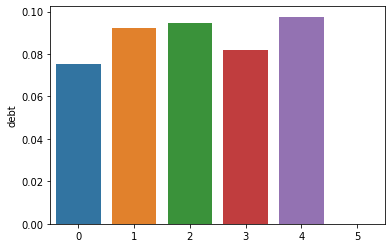

In [24]:
import seaborn as sns

sns.barplot(x=[0, 1, 2, 3, 4, 5], y=debt_table)

In [25]:
# number of clients with an appropriate number of children
data.groupby('children')['children'].count()

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

It should be noted that the number of clients in the groups formed according to the number of available children varies greatly. Clients without children are the absolute majority. There are more clients with several children than with one. This inequality of groups may affect the validity of the conclusions.


**Findings:** 

Judging from the resulting histogram, *clients with five children* have no debt at all. However, compared to other groups, there are far fewer clients in this one. Therefore, we cannot conclude that if a client has 5 children, he/she will definitely pay back the loan.

*Borrowers without children* are the largest group, while characterized by the lowest average debt. They appear to be the most reliable clients.

*Other groups of clients* are less likely to repay loans on time. It can be assumed that there is a correlation: **the more children, the more likely it is that the loan will not be repaid on time**, however, the value of average debt for customers with three children breaks out of it. This may be due to the loss of some data at the preprocessing stage. Nevertheless, the least reliable clients seem to be *people with four children*.

Since borrowers with two or more children are few compared to the other two categories of clients, they should be lumped into one group.

In [26]:
# function for defining new categories according to the number of children
def define_children_category(children):
    if children == 0:
        return 0
    if children == 1:
        return 1
    return '>2'

In [27]:
data['children_category'] = data['children'].apply(define_children_category)

In [28]:
# average debt for new categories
debt_children_table = data.groupby('children_category')['debt'].mean()
debt_children_table

children_category
0     0.075438
1     0.092346
>2    0.092516
Name: debt, dtype: float64

<AxesSubplot:ylabel='debt'>

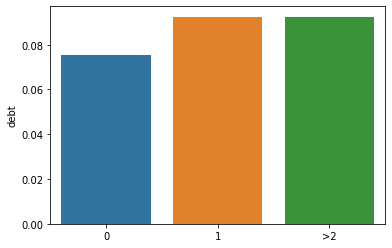

In [29]:
sns.barplot(x=[0, 1, '>2'], y=debt_children_table)

In [30]:
# number of clients with an appropriate number of children
data.groupby('children_category')['children_category'].count()

children_category
0     14091
1      4808
>2     2432
Name: children_category, dtype: int64

**Conclusion:**

The chart shows that the average debt for clients *with one* and *two or more children* is comparable and, at the same time, significantly higher than for borrowers without children. Therefore, it can be concluded that **having children, in general, reduces the likelihood of repayment on time**.

#### 2. Is there a correlation between marital status and loan repayment on time?

In [55]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [56]:
# average debt according to marital status
debt_family_table = data.groupby('family_status_id')['debt'].mean()
debt_family_table

family_status_id
0    0.075606
1    0.093130
2    0.066246
3    0.070648
4    0.097639
Name: debt, dtype: float64

<AxesSubplot:ylabel='debt'>

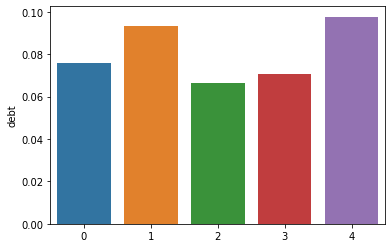

In [58]:
sns.barplot(x=[0,1,2,3,4], y=debt_family_table)

In [54]:
# dictionary of marital status correspondence and marital status id
family_status_dict = data.groupby('family_status')['family_status_id'].mean()
family_status_dict

family_status
Не женат / не замужем    4
в разводе                3
вдовец / вдова           2
гражданский брак         1
женат / замужем          0
Name: family_status_id, dtype: int64

In [46]:
data.groupby('family_status')['family_status'].count()

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: family_status, dtype: int64

**Conclusion:** 

The smallest values of average debt are characterized by clients who are *divorced* or who are *widowed or widowed*, i.e. who had a family before. Comparable values of average debt are also demonstrated by the category of borrowers who are *officially married*. The majority of clients belong to this category. 

People falling into the categories "*not married/not married*" and "*civil partnership*", on the contrary, show the highest values. They are less likely to repay loans on time and therefore less reliable.

It can be assumed that there is a correlation and **married or married customers are more reliable**.

#### 3. Is there a correlation between income level and loan repayment on time?

Income levels:
- 0-30000 - 'E';
- 30001-50000 - 'D';
- 50001-200000 - 'C';
- 200001-1000000 - 'B';
- 1000001 and above - 'A'.

In [32]:
# average debt by income category
debt_income_table = data.groupby('total_income_category')['debt'].mean()
debt_income_table

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

<AxesSubplot:ylabel='debt'>

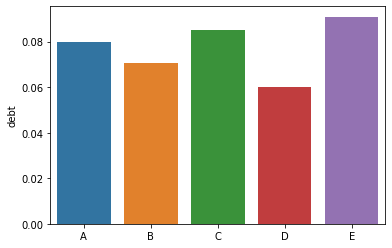

In [33]:
sns.barplot(x=['A','B','C','D','E'], y=debt_income_table)

<AxesSubplot:ylabel='debt'>

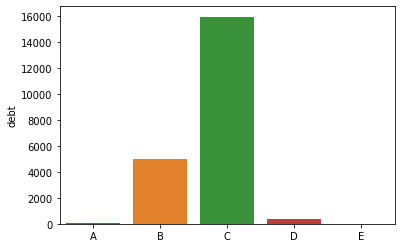

In [34]:
# distribution of clients by income level
income_category_count = data.groupby('total_income_category')['debt'].count()
sns.barplot(x=['A','B','C','D','E'], y=income_category_count)

In [35]:
income_category_count

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64

**Conclusion:** 

The vast majority of clients belong to *category C* - people with average income. Other categories of borrowers are too few to draw representative conclusions from. Even if we combine categories A and B ("below average") and C and D ("above average"), it would not be possible to form groups with comparable numbers of borrowers. Therefore, it is **not possible** to make an unambiguous conclusion about whether the probability of loan repayment at maturity depends on the client's income.

#### 4. How do the different purposes of a loan affect its repayment at maturity?

In [69]:
debt_purpose_table = data.groupby('purpose_category')['debt'].mean()
debt_purpose_table

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

In [72]:
purposes = []
for category in debt_purpose_table.index:
    purposes.append(category)

purposes

['операции с автомобилем',
 'операции с недвижимостью',
 'получение образования',
 'проведение свадьбы']

<AxesSubplot:ylabel='debt'>

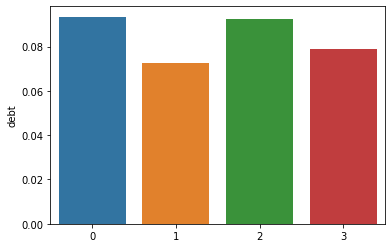

In [74]:
sns.barplot(x=[0,1,2,3], y=debt_purpose_table)

In [75]:
data.groupby('purpose_category')['debt'].count()

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

**Conclusion:** 

Generally, loans taken out for *real estate* transactions (home purchase, rentals, etc.) are the best repaid. This is the most popular purpose. Loans for *wedding* are the second most likely to be repaid. 

Loans taken out for *automobile operations* or *education* were taken out by approximately equal numbers of people, and with almost equal probability some of them were not repaid.

## Overall conclusion:

In total, up to 10% of borrowers repay their debt to the bank on time. At the same time, according to the results obtained:
- *the most reliable clients* are people without children, married or previously married.
- The *most popular purpose indicated* is taking a loan for real estate transactions. At the same time, loans taken for these purposes are better repaid in due time. 
- No clear correlation between the likelihood of timely repayment and *client income* was found due to a lack of data on borrowers with certain income levels.